## Imports 

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Electrical Grid Stability Simulated Data Data Set 

In [4]:
df = pd.read_csv("UCI.csv")

In [5]:
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


## Dummy variable for stabf column

In [6]:
a = pd.get_dummies(df["stabf"], drop_first = True)
df["unstable"] = a

## Heatmap

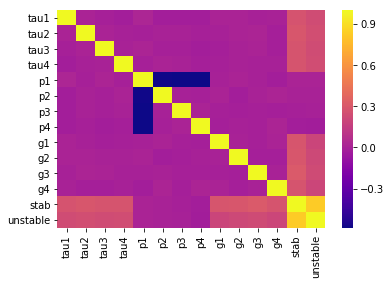

In [7]:
sns.heatmap(df.corr(), cmap = "plasma")

In [8]:
X = df.drop(["stab", "stabf", "unstable"], axis = 1)
y = df[["unstable"]]

## Normalization

In [9]:
from sklearn.preprocessing import Normalizer

In [10]:
nrm = Normalizer()


In [11]:
nrm.fit(X)
X = pd.DataFrame(data = nrm.transform(X), columns = X.columns)

In [12]:
X.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
0,0.205999,0.214410,0.583456,0.680900,0.261972,-0.054482,-0.087535,-0.119955,0.045282,0.059841,0.061781,0.066695
1,0.739880,0.389858,0.242346,0.108894,0.403002,-0.154277,-0.148924,-0.099801,0.032878,0.068581,0.044702,0.062167
2,0.657122,0.648093,0.223136,0.088956,0.249407,-0.088439,-0.093548,-0.067420,0.011942,0.056155,0.061484,0.008046
3,0.068742,0.735918,0.430505,0.224583,0.380336,-0.098589,-0.186047,-0.095701,0.042815,0.093721,0.089176,0.034804
4,0.216952,0.526701,0.342221,0.682369,0.244067,-0.077912,-0.127784,-0.038371,0.055178,0.031528,0.045476,0.056827


## ML algorithms imports

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [67]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [70]:
def launch_ml(xtrain,ytrain,xtest, ytest):
    ### Function that generate class predictions for all ML algorithms with
    ### related classification report, confusion_matrix,  and ROC cruve
    
    log = LogisticRegression()
    tree = DecisionTreeClassifier()
    forest = RandomForestClassifier(n_estimators=200)
    svm = SVC()
    knn = KNeighborsClassifier(n_neighbors= 3)
    liste_ml = [log, tree, forest, svm, knn]
        
    for i in liste_ml:
        i.fit(xtrain,ytrain)
        predi = i.predict(xtest)
        print("Classification report of {}  ".format(str(i)))
        print("\n")
        print(classification_report(ytest, predi))
        
        print("Confusion Matrix of {}  ".format(str(i)))
        print("\n")
        print(confusion_matrix(ytest, predi))
        
        print("Roc Curve {}  ".format(str(i)))
        print("\n")
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        
        for i in range(2):
            fpr[i], tpr[i], _ = roc_curve(y_test, predi)
            roc_auc[i] = auc(fpr[i], tpr[i])
        
        plt.figure()
        lw = 2
        plt.plot(fpr[1], tpr[1], color='darkorange',lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[1])
        plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()   
  
    
    
    

C:\Users\Anass\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)  


             precision    recall  f1-score   support

          0       0.79      0.59      0.68      1061
          1       0.80      0.91      0.86      1939

avg / total       0.80      0.80      0.79      3000

Confusion Matrix of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)  


[[ 627  434]
 [ 167 1772]]
Roc Curve LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          pena

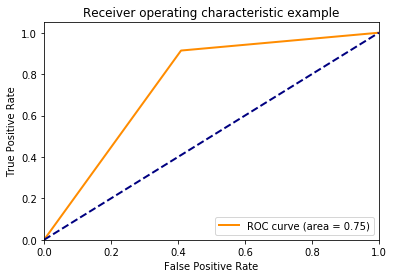

Classification report of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')  


             precision    recall  f1-score   support

          0       0.70      0.72      0.71      1061
          1       0.84      0.83      0.84      1939

avg / total       0.79      0.79      0.79      3000

Confusion Matrix of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')  


[[ 762  299]
 [ 331 1608]]
Roc C

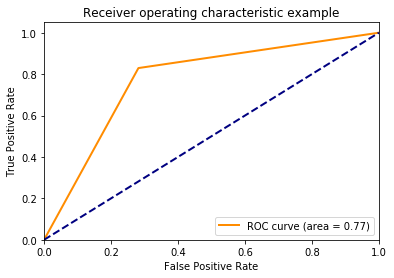

C:\Users\Anass\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Classification report of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)  


             precision    recall  f1-score   support

          0       0.84      0.80      0.82      1061
          1       0.89      0.91      0.90      1939

avg / total       0.87      0.88      0.87      3000

Confusion Matrix of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimat

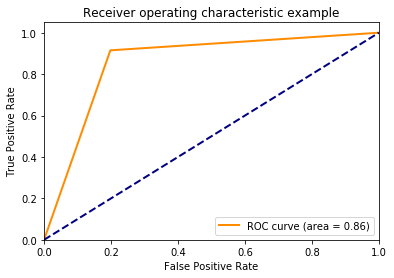

C:\Users\Anass\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Classification report of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)  


             precision    recall  f1-score   support

          0       0.80      0.54      0.64      1061
          1       0.79      0.93      0.85      1939

avg / total       0.79      0.79      0.78      3000

Confusion Matrix of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)  


[[ 569  492]
 [ 142 1797]]
Roc Curve SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)  




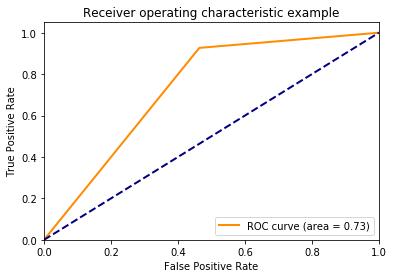

C:\Users\Anass\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


Classification report of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')  


             precision    recall  f1-score   support

          0       0.69      0.63      0.66      1061
          1       0.81      0.84      0.82      1939

avg / total       0.76      0.77      0.77      3000

Confusion Matrix of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')  


[[ 668  393]
 [ 302 1637]]
Roc Curve KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')  




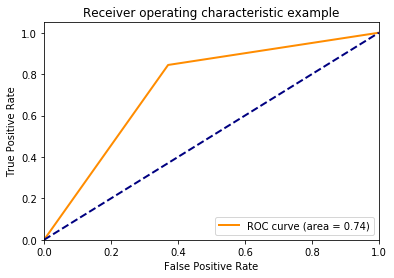

In [71]:
launch_ml(X_train, y_train, X_test, y_test)